<a href="https://colab.research.google.com/github/manahill-prac/ElevvoPathways_Titanic_EDA/blob/main/notebooks/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic EDA
Exploratory Data Analysis on Titanic dataset.




In [1]:
# ---------- Robust notebook setup (paste as first cell) ----------
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Repository info (your repo)
REPO_URL  = "https://github.com/manahill-prac/ElevvoPathways_Titanic_EDA.git"
REPO_DIR  = "ElevvoPathways_Titanic_EDA"   # folder name created by git clone
REL_DATA  = os.path.join("data", "train.csv")  # expected path inside repo
ALT_DATA  = "/content/train.csv"               # common Colab upload path

# 1) If the data already exists in the current working dir (e.g., opened from repo), use it
if os.path.exists(REL_DATA):
    data_path = REL_DATA
    print(f"Using dataset from repository path: {data_path}")
else:
    # 2) If repo already cloned into workspace, cd into it
    if os.path.isdir(REPO_DIR) and not os.path.exists(REL_DATA):
        print(f"Found local '{REPO_DIR}' folder. Changing working directory into it.")
        %cd {REPO_DIR}
    # 3) If dataset still not present, try cloning the repo (safe: check first)
    if not os.path.exists(REL_DATA):
        print(f"Cloning repository {REPO_URL} ...")
        !git clone {REPO_URL}
        if os.path.isdir(REPO_DIR):
            %cd {REPO_DIR}
        else:
            # cloning failed — continue to check alternate locations
            print("Warning: repo clone may have failed or the folder name differs.")
    # After clone/change dir, set data_path
    data_path = REL_DATA

# 4) If data not found inside repo, fall back to /content (user may have uploaded there)
if not os.path.exists(data_path):
    if os.path.exists(ALT_DATA):
        data_path = ALT_DATA
        print(f"Using uploaded file at: {data_path}")
    else:
        # give a clear instruction and list current files to help debugging
        print("\nERROR — dataset not found.")
        print(f"Expected one of:\n - {REL_DATA} (in the repo)\n - {ALT_DATA} (uploaded to Colab)")
        print("\nCurrent working directory:", os.getcwd())
        print("Files in current directory:", os.listdir(".")[:50])
        raise FileNotFoundError("Please add train.csv to the repo 'data/' folder or upload to Colab (/content/train.csv).")

# 5) Safe imports & display settings
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
np.random.seed(42)

# 6) Optional package check
try:
    import missingno as msno
    HAVE_MISSINGNO = True
except Exception:
    HAVE_MISSINGNO = False
    print("Note: missingno not installed — missing-value matrix will be skipped.")

# 7) Load dataset (wrapped in try/except for clear errors)
try:
    df = pd.read_csv(data_path)
    print("✅ Loaded dataset:", data_path, " → shape:", df.shape)
except Exception as e:
    raise RuntimeError(f"Failed to load dataset from {data_path}: {e}")

# 8) Quick sanity output (small)
display(df.head(3))
print("\nColumns:", list(df.columns))
print("Index range:", df.index.min(), "to", df.index.max())

# ---------- End of setup cell ----------


Cloning repository https://github.com/manahill-prac/ElevvoPathways_Titanic_EDA.git ...
Cloning into 'ElevvoPathways_Titanic_EDA'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 55 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 468.99 KiB | 4.11 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/ElevvoPathways_Titanic_EDA
✅ Loaded dataset: data/train.csv  → shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Index range: 0 to 890


In [2]:
# -----------------------------
# 📦 Install Required Libraries
# -----------------------------
!pip install tabulate missingno


📂 Dataset Shape: (891, 12)

📜 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

📊 Dataset Info Table:
╒═════════════╤══════════════════╤═════════════════╤═════════════╤═════════════╕
│ Column      │   Non-Null Count │   Missing Count │   Missing % │ Data Type   │
╞═════════════╪══════════════════╪═════════════════╪═════════════╪═════════════╡
│ PassengerId │              891 │               0 │        0    │ int64       │
├─────────────┼──────────────────┼─────────────────┼─────────────┼─────────────┤
│ Survived    │              891 │               0 │        0    │ int64       │
├─────────────┼──────────────────┼─────────────────┼─────────────┼─────────────┤
│ Pclass      │              891 │               0 │        0    │ int64       │
├─────────────┼──────────────────┼─────────────────┼─────────────┼─────────────┤
│ Name        │              891 │               0 │        0    │ object      │
├──────────

<Figure size 800x400 with 0 Axes>

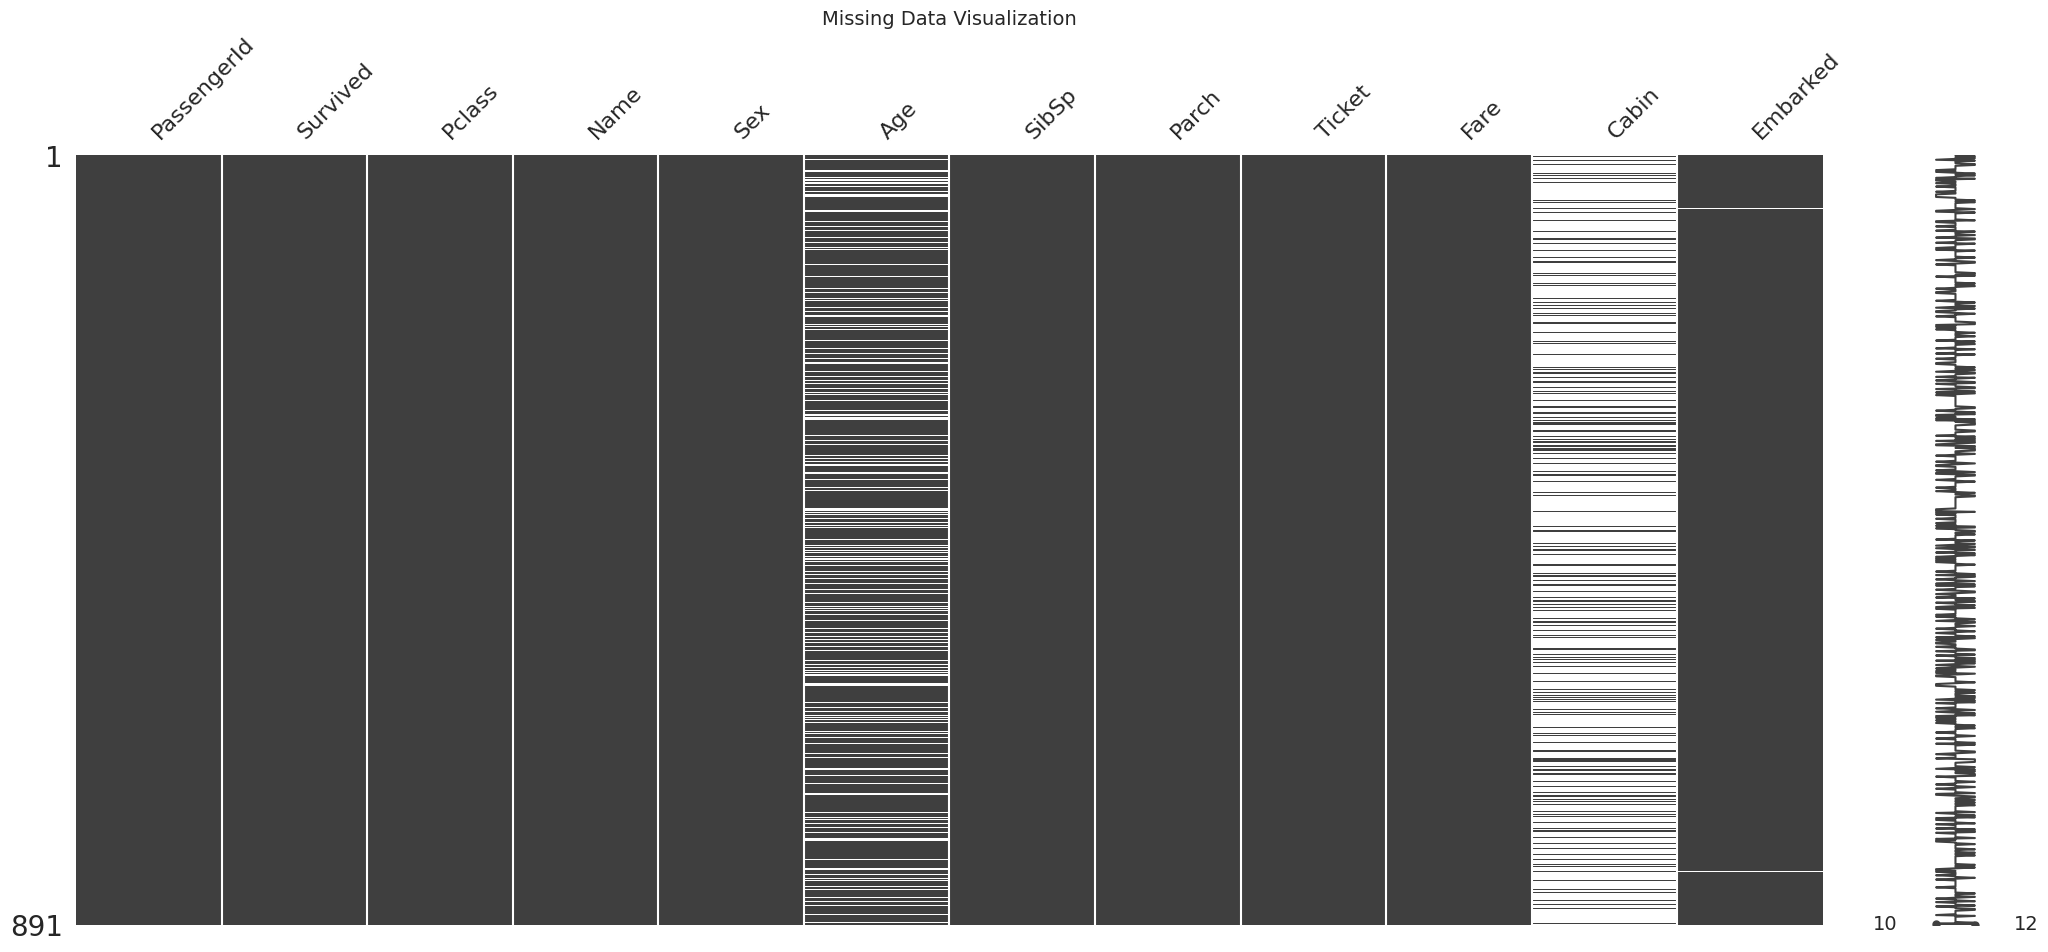

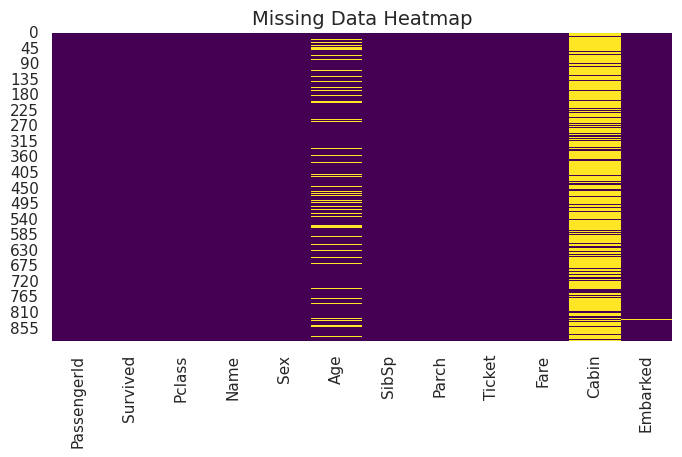

In [3]:
# -----------------------------
# Titanic EDA - Step 1 & Step 2
# -----------------------------

# 1️⃣ Import necessary libraries (some already imported in setup, but repeated here for clarity)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate    # For pretty console tables
import missingno as msno         # For missing value visualization

# 2️⃣ Dataset is already loaded in the setup cell as `df`
#    (from data_path). No need to reload here.
#    Just confirm it's available:
print("📂 Dataset Shape:", df.shape)
print("\n📜 Columns:", df.columns.tolist())

# 3️⃣ Build a compact info table (data types + missing values)
data_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Missing Count": df.isnull().sum(),
    "Missing %": (df.isnull().sum() / len(df) * 100).round(2),
    "Data Type": df.dtypes
}).reset_index(drop=True)

print("\n📊 Dataset Info Table:")
print(tabulate(data_info, headers='keys', tablefmt='fancy_grid', showindex=False))

# 4️⃣ Display first 5 rows (sample data preview)
print("\n🔍 Sample Data:")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid', showindex=False))

# 5️⃣ Quick numerical summary (transpose for readability)
print("\n📈 Numerical Summary:")
print(tabulate(df.describe().T, headers='keys', tablefmt='fancy_grid'))

# 6️⃣ Missing Data Visualization (matrix view)
plt.figure(figsize=(8, 4))
msno.matrix(df)
plt.title("Missing Data Visualization", fontsize=14)
plt.show()

# 7️⃣ Heatmap for missing values (binary mask)
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap", fontsize=14)
plt.show()


✅ Raw train.csv loaded. Rows, cols: (891, 12) 

📌 Missing Values - BEFORE Cleaning


,Missing Values,Percentage (%)
Age,177,19.870000
Cabin,687,77.100000
Embarked,2,0.220000


ℹ️ 'Cabin' dropped (missing 77.1% of values).

📌 Missing Values - AFTER Cleaning
✅ Missing values handled successfully!



,Before Missing Values,Before %,After Missing Values,After %
Age,177,19.87%,0,0.00%
Cabin,687,77.10%,0,0.00%
Embarked,2,0.22%,0,0.00%


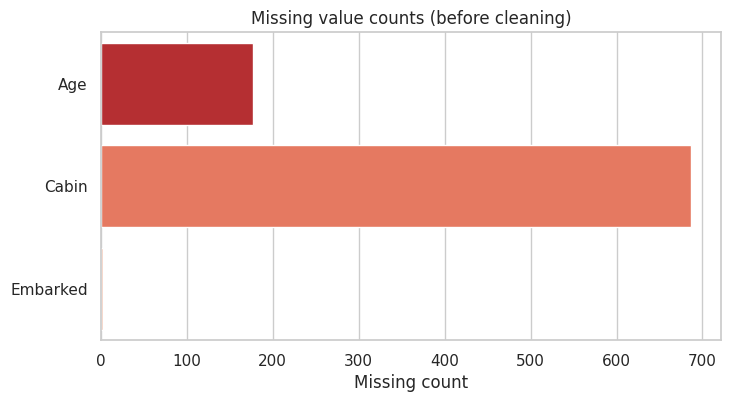


🔎 Cleaned Data Preview (first 8 rows):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0



💾 Cleaned dataset saved as /content/titanic_cleaned_portfolio.csv


In [4]:
# -----------------------------
# Step 03 - Smart Cleaning + Before/After Table
# -----------------------------

import warnings
warnings.filterwarnings('ignore')   # hide pandas FutureWarnings for clean output

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# ---- Load raw data (using the path set in setup cell) ----
raw_df = pd.read_csv(data_path)   # ✅ safer than hardcoding /content/train.csv
print("✅ Raw train.csv loaded. Rows, cols:", raw_df.shape, "\n")

# ---- 1) Helper: Missing values summary ----
def missing_table(df):
    miss = df.isnull().sum()
    miss = miss[miss > 0]
    miss_pct = (miss / len(df) * 100).round(2)
    return pd.DataFrame({
        'Missing Values': miss,
        'Percentage (%)': miss_pct
    })

missing_before = missing_table(raw_df)

print("📌 Missing Values - BEFORE Cleaning")
if missing_before.empty:
    print("✅ No missing values detected in the raw dataset.\n")
else:
    display(missing_before.style.background_gradient(
        subset=['Percentage (%)'], cmap='Reds'
    ).set_caption("Missing values (before cleaning)"))

# ---- 2) Copy & Clean ----
df = raw_df.copy()

# Fill Age by median grouped on Pclass & Sex
if 'Age' in df.columns:
    df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
        lambda x: x.fillna(x.median())
    )
    df['Age'] = df['Age'].fillna(df['Age'].median())  # fallback

# Fill Embarked with mode
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill Fare with median
if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Cabin handling
if 'Cabin' in df.columns:
    df['Cabin_Known'] = df['Cabin'].notnull().astype(int)
    cabin_missing_pct = df['Cabin'].isnull().mean()
    if cabin_missing_pct > 0.75:
        df.drop(columns=['Cabin'], inplace=True)
        print(f"ℹ️ 'Cabin' dropped (missing {cabin_missing_pct:.1%} of values).")
    else:
        df['Cabin'] = df['Cabin'].fillna('Unknown')

# Convert some features to categorical
for c in ['Pclass', 'Sex', 'Embarked']:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Drop duplicates (if any)
dup_count = df.duplicated(subset=['Name', 'Ticket', 'Fare']).sum()
if dup_count > 0:
    df.drop_duplicates(subset=['Name', 'Ticket', 'Fare'], inplace=True)
    print(f"ℹ️ Dropped {dup_count} duplicate rows based on Name/Ticket/Fare.")

# ---- 3) Missing values AFTER cleaning ----
missing_after = missing_table(df)

print("\n📌 Missing Values - AFTER Cleaning")
if missing_after.empty:
    print("✅ Missing values handled successfully!\n")
else:
    display(missing_after.style.background_gradient(
        subset=['Percentage (%)'], cmap='Reds'
    ).set_caption("Missing values (after cleaning)"))

# ---- 4) Combined Before vs After table ----
combined = pd.DataFrame(index=sorted(
    set(list(missing_before.index) + list(missing_after.index))
))
combined['Before Missing Values'] = (
    missing_before['Missing Values'] if not missing_before.empty else 0
)
combined['Before %'] = (
    missing_before['Percentage (%)'] if not missing_before.empty else 0.0
)
combined['After Missing Values'] = (
    missing_after['Missing Values'] if not missing_after.empty else 0
)
combined['After %'] = (
    missing_after['Percentage (%)'] if not missing_after.empty else 0.0
)

combined.fillna(0, inplace=True)

if not combined.empty:
    display(combined.style.format({
        'Before %': '{:.2f}%', 'After %': '{:.2f}%'
    }).background_gradient(
        subset=['Before %','After %'], cmap='Reds'
    ).set_caption("Missing Values: Before vs After Cleaning"))

# ---- 5) Visualize missingness (only if existed) ----
if not missing_before.empty:
    plt.figure(figsize=(8,4))
    sns.barplot(
        x=missing_before['Missing Values'].values,
        y=missing_before.index,
        palette='Reds_r'
    )
    plt.title('Missing value counts (before cleaning)')
    plt.xlabel('Missing count')
    plt.ylabel('')
    plt.show()
else:
    print("ℹ️ No missing values to visualize (raw data had none).")

# ---- 6) Quick preview of cleaned dataframe ----
print("\n🔎 Cleaned Data Preview (first 8 rows):")
display(df.head(8))

# ---- 7) Save cleaned dataset ----
cleaned_path = '/content/titanic_cleaned_portfolio.csv'
df.to_csv(cleaned_path, index=False)
print(f"\n💾 Cleaned dataset saved as {cleaned_path}")


In [5]:
# 📌 Step 04: Summary Statistics + Survival Summary

print("📊 Summary Statistics\n")

# 1️⃣ Summary statistics for numerical features
summary_stats = df.describe().T.reset_index()
summary_stats.rename(columns={
    'index': 'Feature',
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
}, inplace=True)

# Round numeric values for cleaner output
summary_stats = summary_stats.round(2)

# Display nicely formatted table
from tabulate import tabulate
print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid', showindex=False))


# 2️⃣ Survival Summary Table
print("\n📊 Survival Summary Table\n")

# Create age groups for clearer summary
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

# Group survival by key features
survival_summary = {
    "Sex": df.groupby("Sex")["Survived"].mean().round(2),
    "Pclass": df.groupby("Pclass")["Survived"].mean().round(2),
    "AgeGroup": df.groupby("AgeGroup")["Survived"].mean().round(2),
    "Embarked": df.groupby("Embarked")["Survived"].mean().round(2)
}

# Convert dict of series into one DataFrame
survival_table = pd.DataFrame(survival_summary)

# Display nicely formatted table
print(tabulate(survival_table.reset_index(), headers='keys', tablefmt='fancy_grid', showindex=False))


📊 Summary Statistics

╒═════════════╤═════════╤════════╤═══════════╤═══════╤════════════╤════════════════╤════════════╤════════╕
│ Feature     │   Count │   Mean │   Std Dev │   Min │   Q1 (25%) │   Median (50%) │   Q3 (75%) │    Max │
╞═════════════╪═════════╪════════╪═══════════╪═══════╪════════════╪════════════════╪════════════╪════════╡
│ PassengerId │     891 │ 446    │    257.35 │  1    │     223.5  │         446    │      668.5 │ 891    │
├─────────────┼─────────┼────────┼───────────┼───────┼────────────┼────────────────┼────────────┼────────┤
│ Survived    │     891 │   0.38 │      0.49 │  0    │       0    │           0    │        1   │   1    │
├─────────────┼─────────┼────────┼───────────┼───────┼────────────┼────────────────┼────────────┼────────┤
│ Age         │     891 │  29.11 │     13.3  │  0.42 │      21.5  │          26    │       36   │  80    │
├─────────────┼─────────┼────────┼───────────┼───────┼────────────┼────────────────┼────────────┼────────┤
│ SibSp       │

Data shape: (891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Known,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Adult


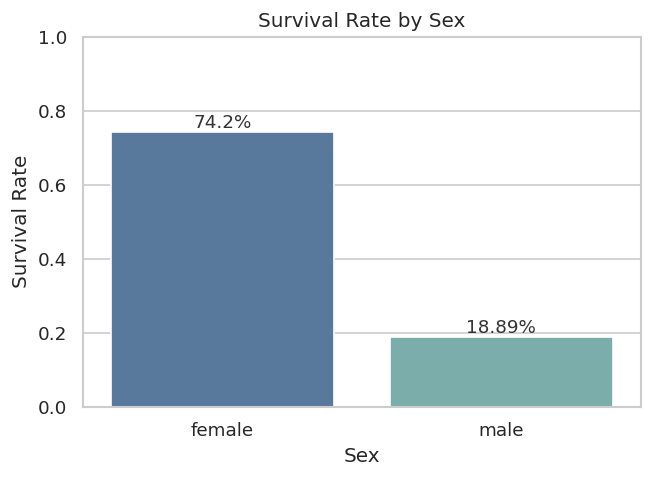

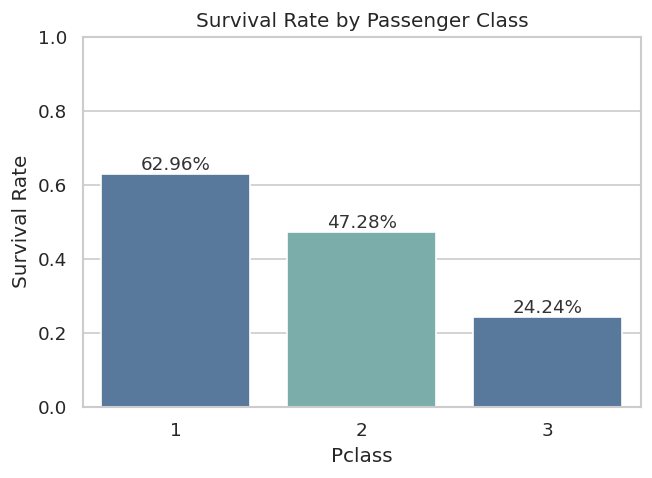

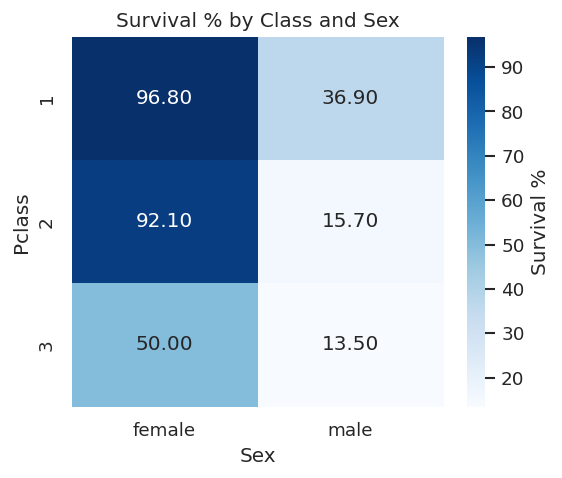

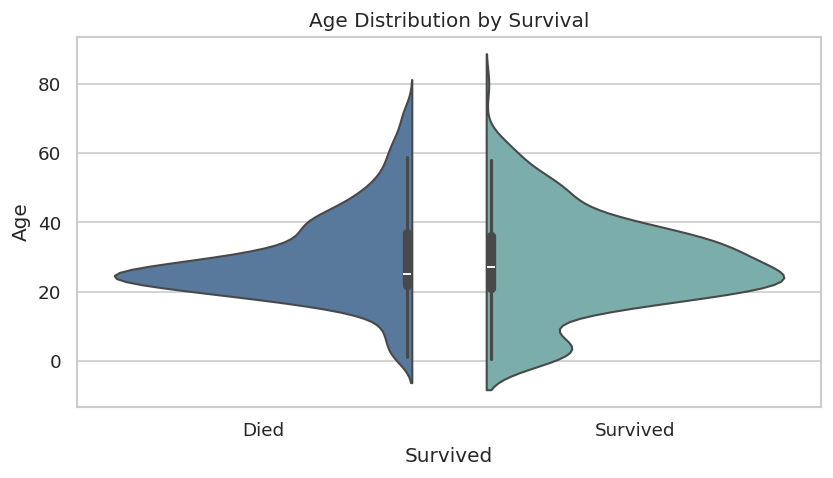

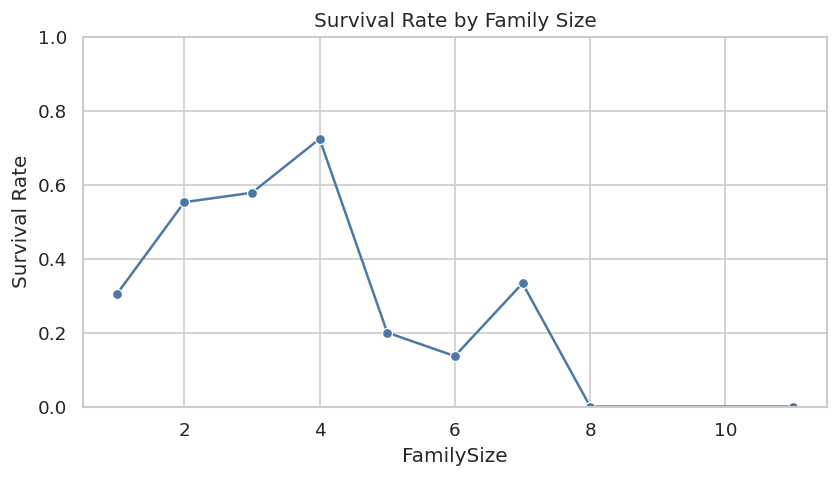

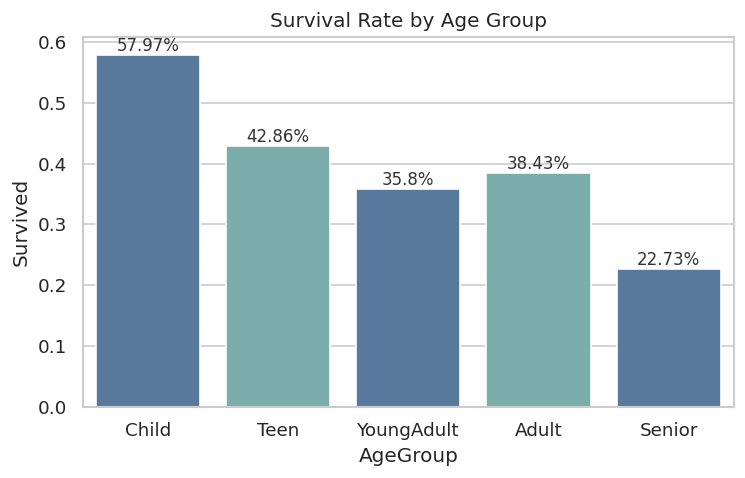

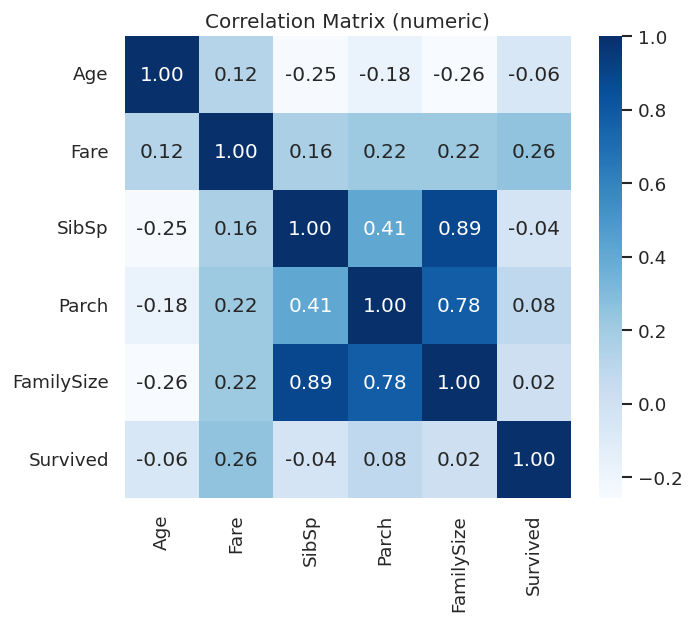


Key survival tables (top rows):


,Sex,Survived,Survival%
0,female,0.742038,74.200000
1,male,0.188908,18.890000


,Pclass,Survived,Survival%
0,1,0.629630,62.960000
1,2,0.472826,47.280000
2,3,0.242363,24.240000


,AgeGroup,Survived,Survival%
0,Child,0.579710,57.970000
1,Teen,0.428571,42.860000
2,YoungAdult,0.357977,35.800000
3,Adult,0.384259,38.430000
4,Senior,0.227273,22.730000



💾 All figures saved to /content/*.png and CSVs to /content/*.csv


In [6]:
# -----------------------------
# Step 05: Feature Engineering + Survival Insights & Visuals
# -----------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Use consistent clean theme
sns.set_theme(style="whitegrid")
PALETTE = ["#4C78A8", "#72B7B2"]   # deep blue + soft teal for contrast

print("Data shape:", df.shape)
display(df.head(2))

# -------- Feature Engineering --------
# Family-based features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract titles from passenger names
df['Title'] = df['Name'].str.extract(r',\s*([^.]*)\.', expand=False).fillna("Unknown")
title_map = {'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
df['Title'] = df['Title'].replace(title_map)
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda t: 'Rare' if t in rare_titles else t)

# Age bins for easier analysis
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['Child','Teen','YoungAdult','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Fare bins (quartiles)
df['FareBin'] = pd.qcut(df['Fare'].rank(method='first'), 4, labels=['Low','MedLow','MedHigh','High'])

# Save for reuse
df.to_csv('/content/titanic_features.csv', index=False)

# -------- Survival Statistics --------
pct_round = lambda x: round(x*100, 2)
overall_survival = pct_round(df['Survived'].mean())

surv_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
surv_by_sex['Survival%'] = pct_round(surv_by_sex['Survived'])

surv_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()
surv_by_pclass['Survival%'] = pct_round(surv_by_pclass['Survived'])

surv_pivot = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean').round(3)

surv_by_agegroup = df.groupby('AgeGroup')['Survived'].mean().reset_index()
surv_by_agegroup['Survival%'] = pct_round(surv_by_agegroup['Survived'])

surv_by_family = df.groupby('FamilySize')['Survived'].mean().reset_index()
surv_by_family['Survival%'] = pct_round(surv_by_family['Survived'])

surv_by_alone = df.groupby('IsAlone')['Survived'].mean().reset_index()
surv_by_alone['Survival%'] = pct_round(surv_by_alone['Survived'])
surv_by_alone['IsAlone'] = surv_by_alone['IsAlone'].map({0:'With Family',1:'Alone'})

# -------- Visualizations --------
plt.rcParams['figure.dpi'] = 120

# Helper for safe saving
def safe_savefig(path):
    try:
        plt.savefig(path, bbox_inches='tight')
    except Exception as e:
        print(f"⚠️ Could not save {path}: {e}")

# 1) Survival by Sex
plt.figure(figsize=(6,4))
ax = sns.barplot(data=surv_by_sex, x='Sex', y='Survived', palette=PALETTE)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0,1)
for p, val in zip(ax.patches, surv_by_sex['Survival%']):
    ax.annotate(f"{val}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='#333333')
plt.title('Survival Rate by Sex')
safe_savefig('/content/plot_survival_by_sex.png')
plt.show()

# 2) Survival by Pclass
plt.figure(figsize=(6,4))
ax = sns.barplot(data=surv_by_pclass, x='Pclass', y='Survived', palette=PALETTE)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0,1)
for p, val in zip(ax.patches, surv_by_pclass['Survival%']):
    ax.annotate(f"{val}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='#333333')
plt.title('Survival Rate by Passenger Class')
safe_savefig('/content/plot_survival_by_pclass.png')
plt.show()

# 3) Sex & Class heatmap
plt.figure(figsize=(5,4))
sns.heatmap(surv_pivot*100, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label':'Survival %'})
plt.title('Survival % by Class and Sex')
plt.ylabel('Pclass')
safe_savefig('/content/heatmap_surv_class_sex.png')
plt.show()

# 4) Age distribution by survival (violin)
plt.figure(figsize=(8,4))
try:
    sns.violinplot(x='Survived', y='Age', data=df, palette=PALETTE, split=True)
except TypeError:
    # newer seaborn (>=0.13) removed split=True → fallback
    sns.violinplot(x='Survived', y='Age', data=df, palette=PALETTE)
plt.xticks([0,1], ['Died','Survived'])
plt.title('Age Distribution by Survival')
safe_savefig('/content/violin_age_survival.png')
plt.show()

# 5) Survival vs FamilySize
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=surv_by_family, x='FamilySize', y='Survived', marker='o', color=PALETTE[0])
ax.set_ylabel('Survival Rate')
ax.set_ylim(0,1)
plt.title('Survival Rate by Family Size')
safe_savefig('/content/survival_by_familysize.png')
plt.show()

# 6) AgeGroup survival bar
plt.figure(figsize=(7,4))
ax = sns.barplot(data=surv_by_agegroup, x='AgeGroup', y='Survived', palette=PALETTE)
for p, val in zip(ax.patches, surv_by_agegroup['Survival%'].fillna(0)):
    ax.annotate(f"{val}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='#333333')
plt.title('Survival Rate by Age Group')
safe_savefig('/content/survival_by_agegroup.png')
plt.show()

# 7) Correlation heatmap (numeric only, in case some cols missing)
num_cols = [c for c in ['Age','Fare','SibSp','Parch','FamilySize','Survived'] if c in df.columns]
if num_cols:
    plt.figure(figsize=(6,5))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Correlation Matrix (numeric)')
    safe_savefig('/content/corr_matrix.png')
    plt.show()
else:
    print("ℹ️ No numeric columns found for correlation heatmap.")

# -------- Display survival tables --------
print("\nKey survival tables (top rows):")
display(surv_by_sex.style.set_caption("Survival by Sex"))
display(surv_by_pclass.style.set_caption("Survival by Pclass"))
display(surv_by_agegroup.style.set_caption("Survival by AgeGroup"))

print("\n💾 All figures saved to /content/*.png and CSVs to /content/*.csv")


✅ Dataset loaded from local path.
Shape of dataset: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Remaining missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


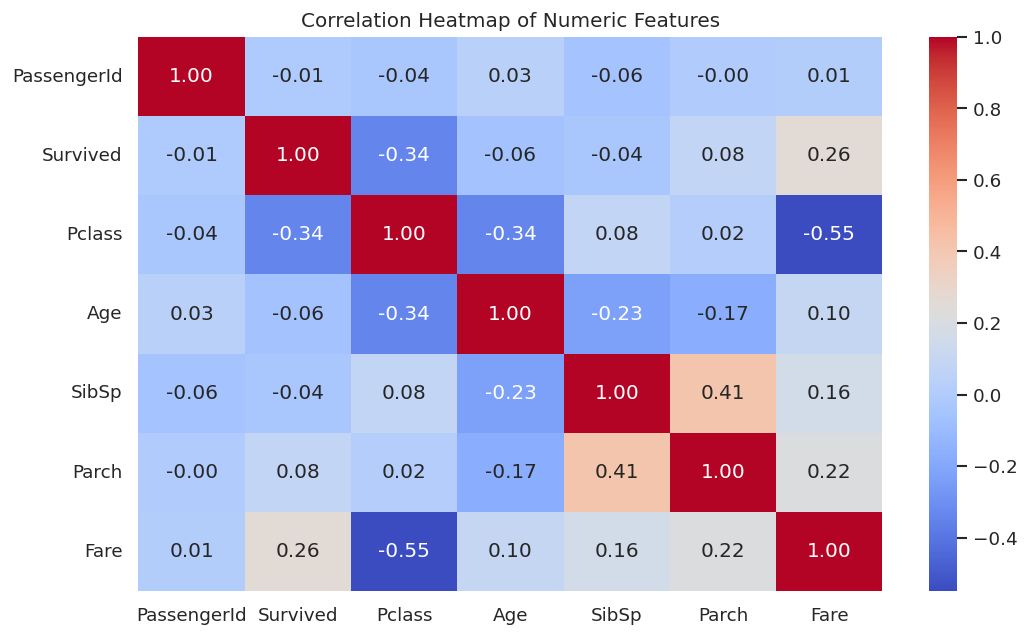

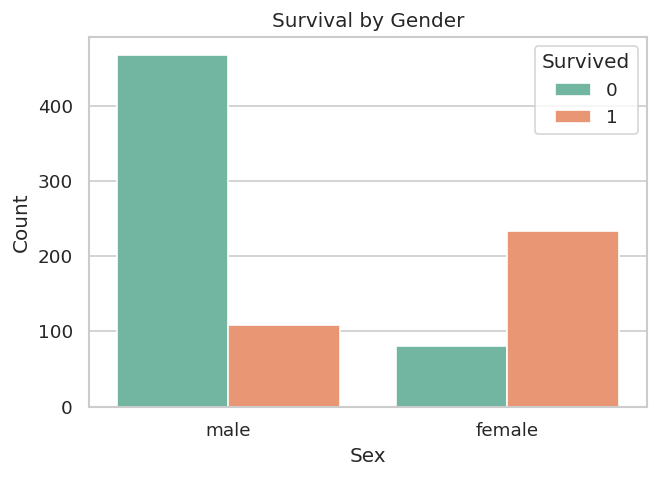

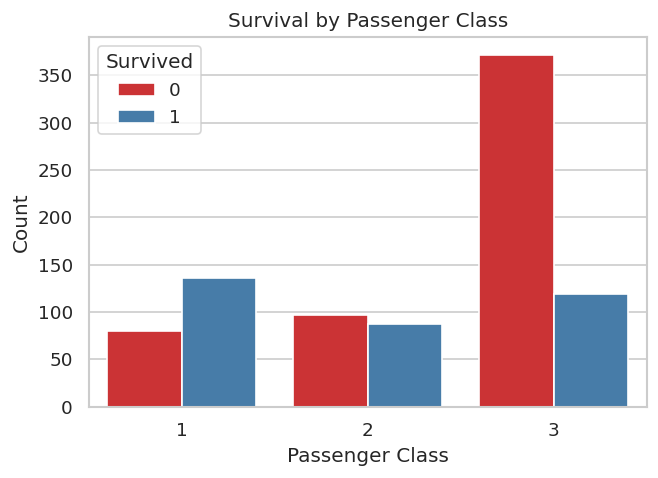

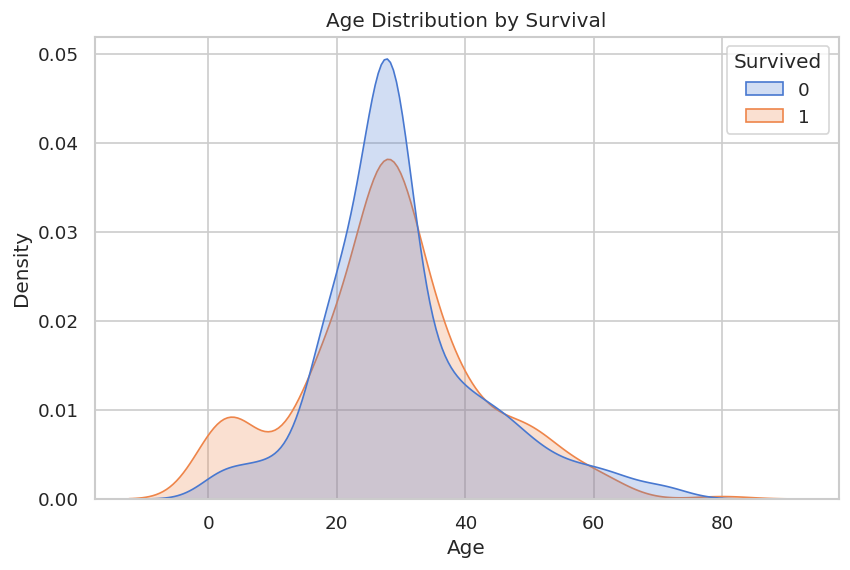

In [8]:
# ==========================
# STEP 06: DATA CLEANING + CORRELATION & SURVIVAL VISUALS
# ==========================

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------- DATA LOADING (robust) -----------
local_path = "data/train.csv"
github_url = "https://raw.githubusercontent.com/<your-username>/<your-repo>/main/data/train.csv"

# Try local first, then GitHub fallback
if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print("✅ Dataset loaded from local path.")
else:
    df = pd.read_csv(github_url)
    print("⚠️ Local dataset not found! Loaded from GitHub instead...")

print(f"Shape of dataset: {df.shape}")
print(f"Columns: {list(df.columns)}")

# ----------- CLEANING -----------
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Unknown")

print("\nRemaining missing values after cleaning:")
print(df.isnull().sum())

# ----------- CORRELATION HEATMAP -----------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# ----------- SURVIVAL VISUALS -----------

# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, common_norm=False, palette="muted")
plt.title("Age Distribution by Survival")
plt.show()


✅ Local dataset found & loaded.
✅ New features added:  ['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin']
💾 Processed dataset saved at: processed/titanic_processed.csv


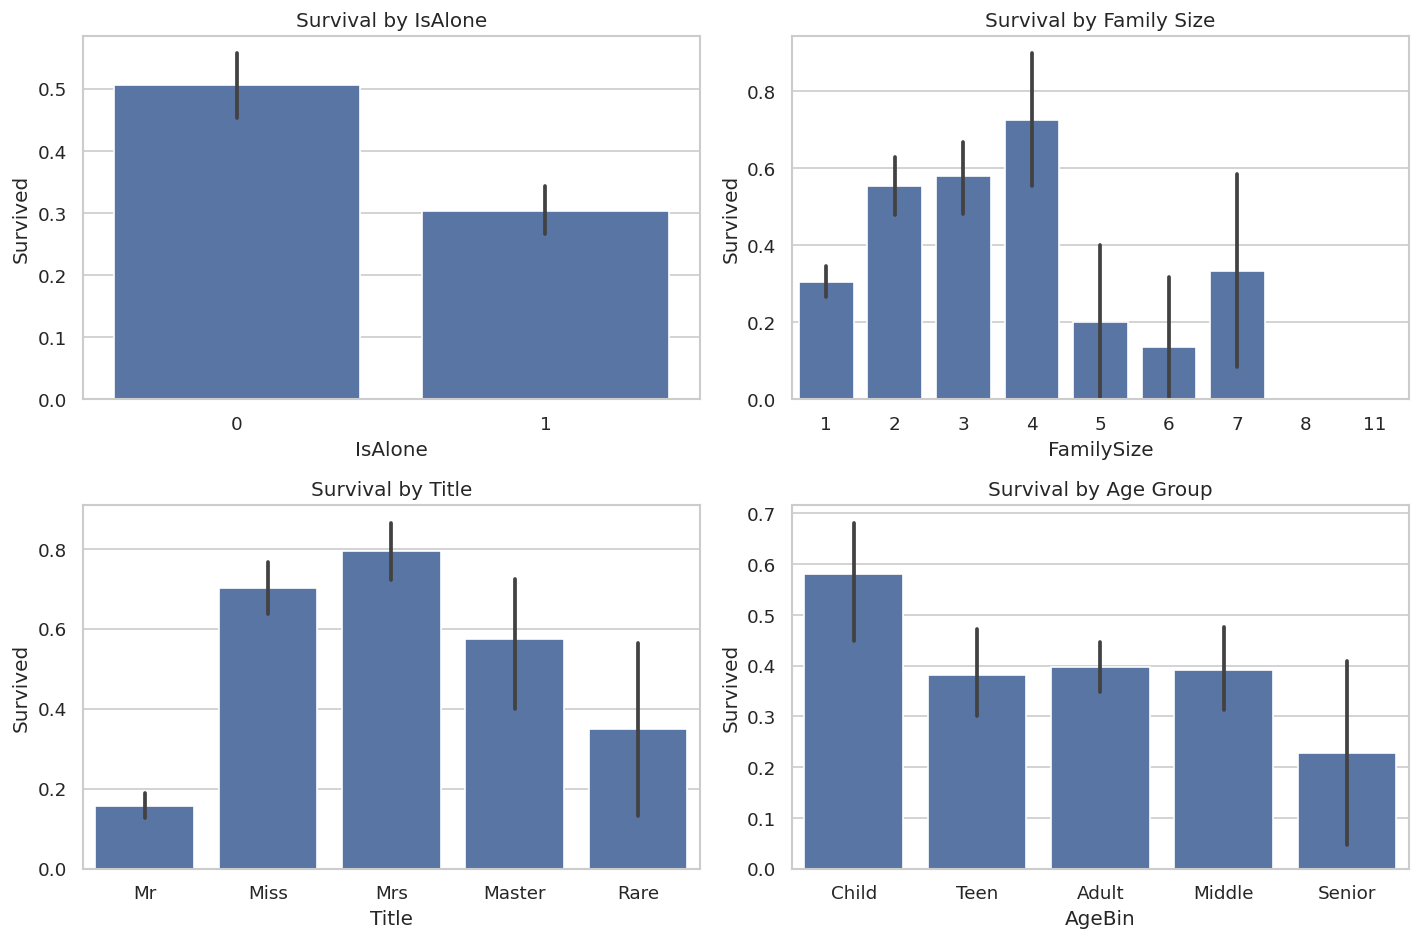

In [10]:
# ================================
# STEP 07: FEATURE ENGINEERING + SAVE
# ================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# (Re-load cleaned data to be safe)
url = "https://raw.githubusercontent.com/<your-username>/<your-repo>/main/data/train.csv"
try:
    df = pd.read_csv("data/train.csv")
    print("✅ Local dataset found & loaded.")
except FileNotFoundError:
    df = pd.read_csv(url)
    print("⚠️ Local dataset not found. Loaded from GitHub instead.")

# --- Feature Engineering ---

# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Is Alone
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

# Extract Title from Name
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
df["Title"] = df["Title"].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major',
     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)
df["Title"] = df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Age Bins
df["AgeBin"] = pd.cut(df["Age"], bins=[0,12,20,40,60,80], labels=["Child","Teen","Adult","Middle","Senior"])

# Fare Bins
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Low","Mid","High","VeryHigh"])

print("✅ New features added: ", ["FamilySize", "IsAlone", "Title", "AgeBin", "FareBin"])

# --- Save processed dataset ---
processed_path = "processed"
os.makedirs(processed_path, exist_ok=True)

df.to_csv(f"{processed_path}/titanic_processed.csv", index=False)
print(f"💾 Processed dataset saved at: {processed_path}/titanic_processed.csv")

# --- Quick Survival Visuals on New Features ---
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(data=df, x="IsAlone", y="Survived", ax=axes[0,0])
axes[0,0].set_title("Survival by IsAlone")

sns.barplot(data=df, x="FamilySize", y="Survived", ax=axes[0,1])
axes[0,1].set_title("Survival by Family Size")

sns.barplot(data=df, x="Title", y="Survived", order=df["Title"].value_counts().index, ax=axes[1,0])
axes[1,0].set_title("Survival by Title")

sns.barplot(data=df, x="AgeBin", y="Survived", ax=axes[1,1])
axes[1,1].set_title("Survival by Age Group")

plt.tight_layout()
plt.show()


✅ Processed dataset saved at: processed/titanic_processed.csv
